# TLC Trip Record Data Prediction
---

### Import packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

import random

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df1= pd.read_csv('green_tripdata-one-.csv')
df1

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,0.5,0.5,0.00,0.00,NaN,0.3,6.80,2.0,1.0,0.00
1,2.0,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,0.5,0.5,2.81,0.00,NaN,0.3,16.86,1.0,1.0,2.75
2,2.0,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,0.5,0.5,1.00,0.00,NaN,0.3,8.30,1.0,1.0,0.00
3,2.0,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,0.5,0.5,0.00,0.00,NaN,0.3,9.30,2.0,1.0,0.00
4,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,0.0,-0.5,0.00,0.00,NaN,-0.3,-52.80,3.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,NaN,2021-01-15 10:35:00,2021-01-15 10:51:00,NaN,NaN,3,147,NaN,5.97,17.01,0.0,0.0,0.00,0.00,NaN,0.3,17.31,NaN,NaN,NaN
76514,NaN,2021-01-15 10:25:00,2021-01-15 10:34:00,NaN,NaN,242,213,NaN,3.83,27.27,0.0,0.0,2.75,0.00,NaN,0.3,30.32,NaN,NaN,NaN
76515,NaN,2021-01-15 10:16:00,2021-01-15 10:20:00,NaN,NaN,181,181,NaN,0.45,12.89,0.0,0.0,2.75,0.00,NaN,0.3,15.94,NaN,NaN,NaN
76516,NaN,2021-01-15 10:16:00,2021-01-15 10:58:00,NaN,NaN,244,72,NaN,22.21,50.67,0.0,0.0,2.75,6.12,NaN,0.3,59.84,NaN,NaN,NaN


In [3]:
df2= pd.read_csv('green_tripdata_two-.csv')
df2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,14.00,0.50,0.5,10.00,0.0,NaN,0.3,25.30,1.0,1.0,0.00
1,2.0,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,6.50,0.50,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.00
2,2.0,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,16.50,0.50,0.5,0.00,0.0,NaN,0.3,20.55,2.0,1.0,2.75
3,2.0,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,21.00,0.50,0.5,0.00,0.0,NaN,0.3,22.30,2.0,1.0,0.00
4,2.0,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,8.50,0.50,0.5,2.45,0.0,NaN,0.3,12.25,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64567,NaN,2021-02-26 08:46:00,2021-02-26 08:59:00,NaN,NaN,167,247,NaN,1.47,14.55,2.75,0.0,0.00,0.0,NaN,0.3,17.60,NaN,NaN,NaN
64568,NaN,2021-02-26 08:56:00,2021-02-26 09:10:00,NaN,NaN,89,123,NaN,2.87,20.22,2.75,0.0,0.00,0.0,NaN,0.3,23.27,NaN,NaN,NaN
64569,NaN,2021-02-26 08:46:00,2021-02-26 09:07:00,NaN,NaN,127,166,NaN,4.74,24.94,5.50,0.0,0.00,0.0,NaN,0.3,30.74,NaN,NaN,NaN
64570,NaN,2021-02-26 08:17:00,2021-02-26 08:51:00,NaN,NaN,42,137,NaN,7.63,41.81,2.75,0.0,0.00,0.0,NaN,0.3,44.86,NaN,NaN,NaN


In [4]:
con_data= pd.concat([df1,df2])   # concat two dataset
con_data.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00
1,2.0,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75
2,2.0,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00
3,2.0,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00
4,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,NaN,-0.3,-52.80,3.0,1.0,0.00
5,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,52.0,0.0,0.5,0.00,0.0,NaN,0.3,52.80,2.0,1.0,0.00
6,2.0,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,0.0,0.0,36.06,0.0,NaN,0.3,216.36,1.0,2.0,0.00
7,2.0,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.5,0.5,0.5,0.96,0.0,NaN,0.3,5.76,1.0,1.0,0.00
8,2.0,2021-01-01 00:57:46,2021-01-01 00:57:57,N,1.0,225,225,1.0,0.00,2.5,0.5,0.5,0.00,0.0,NaN,0.3,3.80,2.0,1.0,0.00
9,2.0,2021-01-01 00:58:32,2021-01-01 01:32:34,N,1.0,225,265,1.0,12.19,38.0,0.5,0.5,2.75,0.0,NaN,0.3,42.05,1.0,1.0,0.00


In [5]:
con_data.shape

(141090, 20)

In [6]:
con_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141090 entries, 0 to 64571
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               75934 non-null   float64
 1   lpep_pickup_datetime   141090 non-null  object 
 2   lpep_dropoff_datetime  141090 non-null  object 
 3   store_and_fwd_flag     75934 non-null   object 
 4   RatecodeID             75934 non-null   float64
 5   PULocationID           141090 non-null  int64  
 6   DOLocationID           141090 non-null  int64  
 7   passenger_count        75934 non-null   float64
 8   trip_distance          141090 non-null  float64
 9   fare_amount            141090 non-null  float64
 10  extra                  141090 non-null  float64
 11  mta_tax                141090 non-null  float64
 12  tip_amount             141090 non-null  float64
 13  tolls_amount           141090 non-null  float64
 14  ehail_fee              0 non-null    

In [7]:
con_data = con_data.sample(frac=1,random_state=79).reset_index(drop=True)

In [8]:
duplicate = con_data.duplicated()
print(duplicate.sum())
con_data[duplicate]

0


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


In [9]:
# Simple Validation Method
con_data_train , con_data_test = train_test_split(con_data, train_size=0.2, random_state=199)

In [10]:
con_data_train2, con_data_val = train_test_split(con_data_train, test_size=0.2, random_state=199)

## Relation Between Features

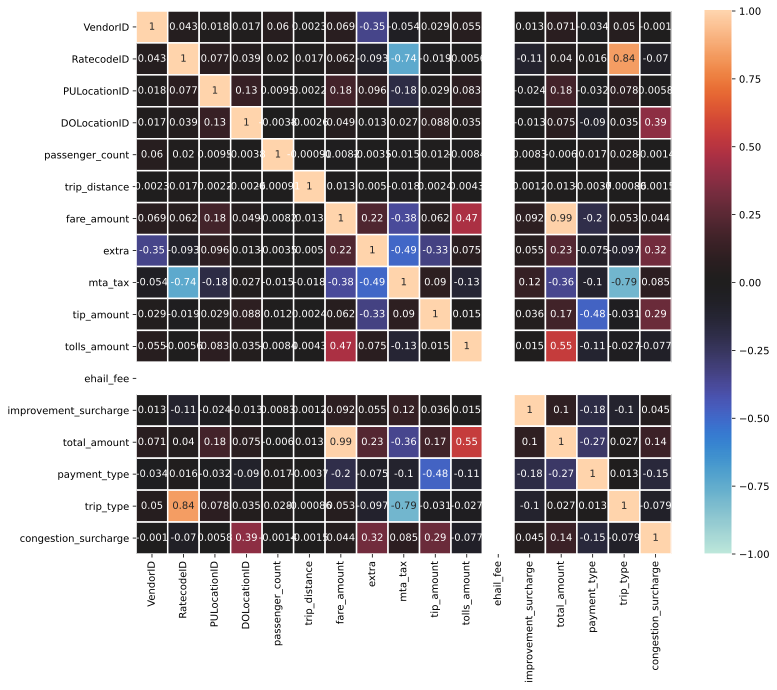

In [11]:
plt.rcParams["figure.figsize"] = (12,10);
sns.heatmap(con_data.corr(), cmap = 'icefire', annot = True, vmin= -1, vmax= 1, linewidths=1.5);

In [12]:
# convert type to datetime
con_data_train2['lpep_pickup_datetime']= pd.to_datetime(con_data_train2['lpep_pickup_datetime'],format="%Y-%m-%d %H:%M:%S")

# convert type to datetime
con_data_val['lpep_pickup_datetime']= pd.to_datetime(con_data_val['lpep_pickup_datetime'],format="%Y-%m-%d %H:%M:%S")

# convert type to datetime
con_data_train2['lpep_dropoff_datetime']= pd.to_datetime(con_data_train2['lpep_dropoff_datetime'],format="%Y-%m-%d %H:%M:%S") 


# convert type to datetime
con_data_val['lpep_dropoff_datetime']= pd.to_datetime(con_data_val['lpep_dropoff_datetime'],format="%Y-%m-%d %H:%M:%S") 

In [13]:
con_data_train2.dtypes

VendorID                        float64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [14]:
con_data_val.dtypes

VendorID                        float64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [15]:
# for train
#extract month

con_data_train2["month_pickup"] = pd.DatetimeIndex(con_data_train2["lpep_pickup_datetime"]).month

#extract week day 
con_data_train2["week_day_pickup"]= con_data_train2["lpep_pickup_datetime"].dt.weekday

#extract day 
con_data_train2["day_pickup"]= con_data_train2["lpep_pickup_datetime"].dt.day

#extract hour
con_data_train2["hour_pickup"]= con_data_train2["lpep_pickup_datetime"].dt.hour 

con_data_train2 =con_data_train2.sort_values(by = "lpep_pickup_datetime",ascending = True)

In [16]:
# for val
#extract month

con_data_val["month_pickup"] = pd.DatetimeIndex(con_data_val["lpep_pickup_datetime"]).month

#extract week day 
con_data_val["week_day_pickup"]= con_data_val["lpep_pickup_datetime"].dt.weekday

#extract day 
con_data_val["day_pickup"]= con_data_val["lpep_pickup_datetime"].dt.day

#extract hour
con_data_val["hour_pickup"]= con_data_val["lpep_pickup_datetime"].dt.hour 

con_data_val =con_data_val.sort_values(by = "lpep_pickup_datetime",ascending = True)

In [17]:
# for train
#extract month

con_data_train2["month_dropoff"] = pd.DatetimeIndex(con_data_train2["lpep_dropoff_datetime"]).month

#extract week day 
con_data_train2["week_day_dropoff"]= con_data_train2["lpep_dropoff_datetime"].dt.weekday

#extract day 
con_data_train2["day_dropoff"]= con_data_train2["lpep_dropoff_datetime"].dt.day

#extract hour
con_data_train2["hour_dropoff"]= con_data_train2["lpep_dropoff_datetime"].dt.hour 

con_data_train2 =con_data_train2.sort_values(by = "lpep_dropoff_datetime",ascending = True)

In [18]:
# for val
#extract month

con_data_val["month_dropoff"] = pd.DatetimeIndex(con_data_val["lpep_dropoff_datetime"]).month

#extract week day 
con_data_val["week_day_dropoff"]= con_data_val["lpep_dropoff_datetime"].dt.weekday

#extract day 
con_data_val["day_dropoff"]= con_data_val["lpep_dropoff_datetime"].dt.day

#extract hour
con_data_val["hour_dropoff"]= con_data_val["lpep_dropoff_datetime"].dt.hour 

con_data_val =con_data_val.sort_values(by = "lpep_dropoff_datetime",ascending = True)

In [19]:
con_data_train2.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,month_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
44125,2.0,2021-01-01 00:07:20,2021-01-01 00:12:01,N,1.0,75,42,1.0,1.68,6.50,...,1.0,0.0,1,4,1,0,1,4,1,0
103716,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,52.00,...,1.0,0.0,1,4,1,0,1,4,1,0
5993,NaN,2021-01-01 00:23:00,2021-01-01 00:28:00,NaN,NaN,17,17,NaN,1.11,16.73,...,NaN,NaN,1,4,1,0,1,4,1,0
8424,NaN,2021-01-01 00:18:00,2021-01-01 00:38:00,NaN,NaN,174,69,NaN,4.34,23.21,...,NaN,NaN,1,4,1,0,1,4,1,0
129543,2.0,2021-01-01 00:42:25,2021-01-01 00:43:06,N,1.0,82,82,1.0,0.00,2.50,...,1.0,0.0,1,4,1,0,1,4,1,0


In [20]:
con_data_val.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,month_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
17266,2.0,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,1.0,0.00,12,3,31,23,1,4,1,0
16535,2.0,2021-01-01 00:32:07,2021-01-01 00:42:54,N,1.0,74,116,1.0,2.08,9.50,...,1.0,0.00,1,4,1,0,1,4,1,0
68284,NaN,2021-01-01 02:14:00,2021-01-01 02:35:00,NaN,NaN,265,216,NaN,7.99,22.20,...,NaN,NaN,1,4,1,2,1,4,1,2
114790,2.0,2021-01-01 02:46:42,2021-01-01 03:03:38,N,1.0,256,164,1.0,5.83,19.50,...,1.0,2.75,1,4,1,2,1,4,1,3
131034,NaN,2021-01-01 03:14:00,2021-01-01 03:32:00,NaN,NaN,17,88,NaN,6.17,19.96,...,NaN,NaN,1,4,1,3,1,4,1,3


In [21]:
con_data_train2.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'month_pickup', 'week_day_pickup', 'day_pickup', 'hour_pickup',
       'month_dropoff', 'week_day_dropoff', 'day_dropoff', 'hour_dropoff'],
      dtype='object')

In [22]:
con_data_val.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'month_pickup', 'week_day_pickup', 'day_pickup', 'hour_pickup',
       'month_dropoff', 'week_day_dropoff', 'day_dropoff', 'hour_dropoff'],
      dtype='object')

In [23]:
date = pd.Timestamp(2021,1,1)
con_data_train2 = con_data_train2[con_data_train2['lpep_pickup_datetime'] >= date ]
con_data_train2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,month_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
44125,2.0,2021-01-01 00:07:20,2021-01-01 00:12:01,N,1.0,75,42,1.0,1.68,6.50,...,1.0,0.00,1,4,1,0,1,4,1,0
103716,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,52.00,...,1.0,0.00,1,4,1,0,1,4,1,0
5993,NaN,2021-01-01 00:23:00,2021-01-01 00:28:00,NaN,NaN,17,17,NaN,1.11,16.73,...,NaN,NaN,1,4,1,0,1,4,1,0
8424,NaN,2021-01-01 00:18:00,2021-01-01 00:38:00,NaN,NaN,174,69,NaN,4.34,23.21,...,NaN,NaN,1,4,1,0,1,4,1,0
129543,2.0,2021-01-01 00:42:25,2021-01-01 00:43:06,N,1.0,82,82,1.0,0.00,2.50,...,1.0,0.00,1,4,1,0,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113805,2.0,2021-02-28 22:09:51,2021-02-28 22:17:24,N,1.0,130,135,1.0,1.58,7.50,...,1.0,0.00,2,6,28,22,2,6,28,22
123406,2.0,2021-02-28 22:21:58,2021-02-28 22:28:24,N,1.0,74,42,1.0,1.00,6.00,...,1.0,0.00,2,6,28,22,2,6,28,22
94482,2.0,2021-02-28 22:41:32,2021-02-28 23:08:58,N,5.0,69,74,2.0,5.06,17.00,...,2.0,0.00,2,6,28,22,2,6,28,23
33047,2.0,2021-02-28 22:58:00,2021-02-28 23:12:07,N,1.0,243,151,1.0,6.29,19.00,...,1.0,2.75,2,6,28,22,2,6,28,23


In [24]:
date = pd.Timestamp(2021,1,1)
con_data_val = con_data_val[con_data_val['lpep_pickup_datetime'] >= date ]
con_data_val

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,month_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
16535,2.0,2021-01-01 00:32:07,2021-01-01 00:42:54,N,1.0,74,116,1.0,2.08,9.50,...,1.0,0.00,1,4,1,0,1,4,1,0
68284,NaN,2021-01-01 02:14:00,2021-01-01 02:35:00,NaN,NaN,265,216,NaN,7.99,22.20,...,NaN,NaN,1,4,1,2,1,4,1,2
114790,2.0,2021-01-01 02:46:42,2021-01-01 03:03:38,N,1.0,256,164,1.0,5.83,19.50,...,1.0,2.75,1,4,1,2,1,4,1,3
131034,NaN,2021-01-01 03:14:00,2021-01-01 03:32:00,NaN,NaN,17,88,NaN,6.17,19.96,...,NaN,NaN,1,4,1,3,1,4,1,3
27436,2.0,2021-01-01 03:23:00,2021-01-01 03:35:59,N,1.0,41,142,5.0,3.52,13.00,...,1.0,2.75,1,4,1,3,1,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65191,2.0,2021-02-28 19:39:10,2021-02-28 19:45:17,N,1.0,41,41,1.0,0.78,6.00,...,1.0,0.00,2,6,28,19,2,6,28,19
93063,2.0,2021-02-28 19:49:30,2021-02-28 20:06:07,N,1.0,260,112,5.0,3.37,14.00,...,1.0,0.00,2,6,28,19,2,6,28,20
72579,2.0,2021-02-28 20:28:06,2021-02-28 20:34:31,N,1.0,74,75,1.0,1.61,7.00,...,1.0,0.00,2,6,28,20,2,6,28,20
28531,2.0,2021-02-28 21:29:40,2021-02-28 21:39:46,N,1.0,74,151,1.0,2.23,9.50,...,1.0,0.00,2,6,28,21,2,6,28,21


In [25]:
date = pd.Timestamp(2021,2,28)
con_data_train2 = con_data_train2[con_data_train2['lpep_pickup_datetime'] <= date ]
con_data_train2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,month_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
44125,2.0,2021-01-01 00:07:20,2021-01-01 00:12:01,N,1.0,75,42,1.0,1.68,6.50,...,1.0,0.00,1,4,1,0,1,4,1,0
103716,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,52.00,...,1.0,0.00,1,4,1,0,1,4,1,0
5993,NaN,2021-01-01 00:23:00,2021-01-01 00:28:00,NaN,NaN,17,17,NaN,1.11,16.73,...,NaN,NaN,1,4,1,0,1,4,1,0
8424,NaN,2021-01-01 00:18:00,2021-01-01 00:38:00,NaN,NaN,174,69,NaN,4.34,23.21,...,NaN,NaN,1,4,1,0,1,4,1,0
129543,2.0,2021-01-01 00:42:25,2021-01-01 00:43:06,N,1.0,82,82,1.0,0.00,2.50,...,1.0,0.00,1,4,1,0,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60293,2.0,2021-02-27 23:29:45,2021-02-27 23:35:30,N,1.0,130,134,1.0,1.81,7.50,...,1.0,0.00,2,5,27,23,2,5,27,23
12461,2.0,2021-02-27 23:28:52,2021-02-27 23:43:24,N,1.0,42,233,1.0,6.06,19.00,...,1.0,2.75,2,5,27,23,2,5,27,23
57267,2.0,2021-02-27 23:38:13,2021-02-27 23:44:26,N,1.0,75,74,1.0,1.50,7.00,...,1.0,0.00,2,5,27,23,2,5,27,23
61959,2.0,2021-02-27 23:30:41,2021-02-27 23:50:26,N,1.0,168,100,1.0,7.73,23.50,...,1.0,2.75,2,5,27,23,2,5,27,23


In [26]:
date = pd.Timestamp(2021,1,1)
con_data_val = con_data_val[con_data_val['lpep_pickup_datetime'] >= date ]
con_data_val

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,month_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
16535,2.0,2021-01-01 00:32:07,2021-01-01 00:42:54,N,1.0,74,116,1.0,2.08,9.50,...,1.0,0.00,1,4,1,0,1,4,1,0
68284,NaN,2021-01-01 02:14:00,2021-01-01 02:35:00,NaN,NaN,265,216,NaN,7.99,22.20,...,NaN,NaN,1,4,1,2,1,4,1,2
114790,2.0,2021-01-01 02:46:42,2021-01-01 03:03:38,N,1.0,256,164,1.0,5.83,19.50,...,1.0,2.75,1,4,1,2,1,4,1,3
131034,NaN,2021-01-01 03:14:00,2021-01-01 03:32:00,NaN,NaN,17,88,NaN,6.17,19.96,...,NaN,NaN,1,4,1,3,1,4,1,3
27436,2.0,2021-01-01 03:23:00,2021-01-01 03:35:59,N,1.0,41,142,5.0,3.52,13.00,...,1.0,2.75,1,4,1,3,1,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65191,2.0,2021-02-28 19:39:10,2021-02-28 19:45:17,N,1.0,41,41,1.0,0.78,6.00,...,1.0,0.00,2,6,28,19,2,6,28,19
93063,2.0,2021-02-28 19:49:30,2021-02-28 20:06:07,N,1.0,260,112,5.0,3.37,14.00,...,1.0,0.00,2,6,28,19,2,6,28,20
72579,2.0,2021-02-28 20:28:06,2021-02-28 20:34:31,N,1.0,74,75,1.0,1.61,7.00,...,1.0,0.00,2,6,28,20,2,6,28,20
28531,2.0,2021-02-28 21:29:40,2021-02-28 21:39:46,N,1.0,74,151,1.0,2.23,9.50,...,1.0,0.00,2,6,28,21,2,6,28,21


In [27]:
con_data_train2= con_data_train2.drop(['lpep_pickup_datetime','lpep_dropoff_datetime'],axis =1)

In [28]:
con_data_val= con_data_val.drop(['lpep_pickup_datetime','lpep_dropoff_datetime'],axis =1)

In [29]:
con_data_train2.isna().sum()

VendorID                 10431
store_and_fwd_flag       10431
RatecodeID               10431
PULocationID                 0
DOLocationID                 0
passenger_count          10431
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                22322
improvement_surcharge        0
total_amount                 0
payment_type             10431
trip_type                10431
congestion_surcharge     10431
month_pickup                 0
week_day_pickup              0
day_pickup                   0
hour_pickup                  0
month_dropoff                0
week_day_dropoff             0
day_dropoff                  0
hour_dropoff                 0
dtype: int64

In [30]:
con_data_val.isna().sum()

VendorID                 2621
store_and_fwd_flag       2621
RatecodeID               2621
PULocationID                0
DOLocationID                0
passenger_count          2621
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
ehail_fee                5643
improvement_surcharge       0
total_amount                0
payment_type             2621
trip_type                2621
congestion_surcharge     2621
month_pickup                0
week_day_pickup             0
day_pickup                  0
hour_pickup                 0
month_dropoff               0
week_day_dropoff            0
day_dropoff                 0
hour_dropoff                0
dtype: int64

In [31]:
# drop columns for Train
con_data_train2.drop(columns=['ehail_fee', 'congestion_surcharge','RatecodeID','total_amount'], inplace=True)


# drop columns for Val
con_data_val.drop(columns=['ehail_fee', 'congestion_surcharge','RatecodeID','total_amount'], inplace=True)

In [32]:
duplicate = con_data_train2.duplicated()
print(duplicate.sum())
con_data_train2[duplicate]

3


,VendorID,store_and_fwd_flag,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,payment_type,trip_type,month_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
4881,1.0,N,145,145,1.0,0.0,2.5,0.0,0.5,0.0,...,2.0,1.0,1,1,5,13,1,1,5,13
25762,1.0,N,145,145,1.0,0.0,2.5,1.0,0.5,0.0,...,2.0,1.0,1,3,21,17,1,3,21,17
33347,2.0,N,193,193,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2,2,10,14,2,2,10,14


In [33]:
# drop duplicates rows
con_data_train2.drop_duplicates(inplace=True)

In [34]:
duplicate = con_data_val.duplicated()
print(duplicate.sum())
con_data_val[duplicate]

1


,VendorID,store_and_fwd_flag,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,payment_type,trip_type,month_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
83571,1.0,N,145,145,1.0,0.0,2.5,1.0,0.5,0.0,...,2.0,1.0,1,3,21,17,1,3,21,17


In [35]:
# drop duplicates rows
con_data_val.drop_duplicates(inplace=True)

In [36]:
# fill passenger_count with mean for Train
mean= con_data_train2['passenger_count'].mean()

con_data_train2['passenger_count'].fillna(mean, inplace= True)
con_data_train2

,VendorID,store_and_fwd_flag,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,payment_type,trip_type,month_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
44125,2.0,N,75,42,1.00000,1.68,6.50,0.5,0.5,0.00,...,2.0,1.0,1,4,1,0,1,4,1,0
103716,2.0,N,265,265,3.00000,0.00,52.00,0.0,0.5,0.00,...,2.0,1.0,1,4,1,0,1,4,1,0
5993,NaN,NaN,17,17,1.19179,1.11,16.73,0.0,0.0,2.75,...,NaN,NaN,1,4,1,0,1,4,1,0
8424,NaN,NaN,174,69,1.19179,4.34,23.21,0.0,0.0,2.75,...,NaN,NaN,1,4,1,0,1,4,1,0
129543,2.0,N,82,82,1.00000,0.00,2.50,0.5,0.5,8.00,...,1.0,1.0,1,4,1,0,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60293,2.0,N,130,134,1.00000,1.81,7.50,0.5,0.5,2.20,...,1.0,1.0,2,5,27,23,2,5,27,23
12461,2.0,N,42,233,1.00000,6.06,19.00,0.5,0.5,0.00,...,1.0,1.0,2,5,27,23,2,5,27,23
57267,2.0,N,75,74,1.00000,1.50,7.00,0.5,0.5,1.66,...,1.0,1.0,2,5,27,23,2,5,27,23
61959,2.0,N,168,100,1.00000,7.73,23.50,0.5,0.5,0.00,...,2.0,1.0,2,5,27,23,2,5,27,23


In [37]:
# fill passenger_count with mean for Val
mean= con_data_val['passenger_count'].mean()

con_data_val['passenger_count'].fillna(mean, inplace= True)
con_data_val

,VendorID,store_and_fwd_flag,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,payment_type,trip_type,month_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
16535,2.0,N,74,116,1.000000,2.08,9.50,0.5,0.5,2.16,...,1.0,1.0,1,4,1,0,1,4,1,0
68284,NaN,NaN,265,216,1.172128,7.99,22.20,0.0,0.0,5.26,...,NaN,NaN,1,4,1,2,1,4,1,2
114790,2.0,N,256,164,1.000000,5.83,19.50,0.5,0.5,0.00,...,2.0,1.0,1,4,1,2,1,4,1,3
131034,NaN,NaN,17,88,1.172128,6.17,19.96,0.0,0.0,5.28,...,NaN,NaN,1,4,1,3,1,4,1,3
27436,2.0,N,41,142,5.000000,3.52,13.00,0.5,0.5,0.00,...,2.0,1.0,1,4,1,3,1,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65191,2.0,N,41,41,1.000000,0.78,6.00,0.0,0.5,2.00,...,1.0,1.0,2,6,28,19,2,6,28,19
93063,2.0,N,260,112,5.000000,3.37,14.00,0.0,0.5,0.00,...,2.0,1.0,2,6,28,19,2,6,28,20
72579,2.0,N,74,75,1.000000,1.61,7.00,0.5,0.5,0.83,...,1.0,1.0,2,6,28,20,2,6,28,20
28531,2.0,N,74,151,1.000000,2.23,9.50,0.5,0.5,2.16,...,1.0,1.0,2,6,28,21,2,6,28,21


In [38]:
# drop null in rows for Train
con_data_train2 = con_data_train2.dropna()

In [39]:
# drop null in rows for Val
con_data_val = con_data_val.dropna()

In [40]:
con_data_train2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VendorID,11888.0,1.824361,0.380529,1.00,2.00,2.00,2.00,2.00
PULocationID,11888.0,98.739233,65.164260,3.00,47.00,75.00,130.00,265.00
DOLocationID,11888.0,132.995121,78.395837,1.00,69.00,130.00,210.00,265.00
passenger_count,11888.0,1.191790,0.752591,0.00,1.00,1.00,1.00,7.00
trip_distance,11888.0,3.416159,4.647051,0.00,1.06,1.86,3.70,90.00
fare_amount,11888.0,14.448911,14.655283,-280.00,6.50,10.00,16.45,244.00
extra,11888.0,0.377881,0.689870,-1.00,0.00,0.00,0.50,4.50
mta_tax,11888.0,0.479559,0.104187,-0.50,0.50,0.50,0.50,0.50
tip_amount,11888.0,1.372084,2.212794,-0.66,0.00,0.00,2.26,80.00
tolls_amount,11888.0,0.295358,1.381728,0.00,0.00,0.00,0.00,31.25


In [41]:
# Remove passenger_count outliers for Train
con_data_train2 = con_data_train2[con_data_train2['passenger_count']>0]
con_data_train2 = con_data_train2[con_data_train2['passenger_count']<9]

# Remove passenger_count outliers for val
con_data_val = con_data_val[con_data_val['passenger_count']>0]
con_data_val = con_data_val[con_data_val['passenger_count']<9]


# removing zero distance trips for Train
con_data_train2 = con_data_train2[con_data_train2['trip_distance'] > 0]

# removing zero distance trips for val
con_data_val = con_data_val[con_data_val['trip_distance'] > 0]



# removing trips with zero/negative fares for Train
con_data_train2= con_data_train2[con_data_train2['fare_amount'] >= 0]


# removing trips with zero/negative fares for val
con_data_val= con_data_val[con_data_val['fare_amount'] >= 0]

In [42]:
# trips with zero distances for val
con_data_val[con_data_val['trip_distance'] == 0]

# trips with zero distances for Train
con_data_train2[con_data_train2['trip_distance'] == 0]

,VendorID,store_and_fwd_flag,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,payment_type,trip_type,month_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,week_day_dropoff,day_dropoff,hour_dropoff


In [43]:
# removing zero distance trips for val
con_data_val = con_data_val[con_data_val['trip_distance'] > 0]
con_data_val.describe()


# removing zero distance trips for Train
con_data_train2 = con_data_train2[con_data_train2['trip_distance'] > 0]
con_data_train2.describe()

,VendorID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,payment_type,trip_type,month_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
count,11294.000000,11294.000000,11294.000000,11294.000000,11294.000000,11294.000000,11294.000000,11294.000000,11294.000000,11294.000000,...,11294.000000,11294.000000,11294.000000,11294.000000,11294.000000,11294.000000,11294.000000,11294.000000,11294.000000,11294.000000
mean,1.840092,97.020985,132.426952,1.198778,3.591238,14.569440,0.392974,0.487515,1.416271,0.297685,...,1.403666,1.022224,1.452187,2.963343,15.684080,13.822738,1.452187,2.963166,15.689481,14.000354
std,0.366537,63.862351,78.184254,0.760344,4.699333,14.352532,0.698504,0.078019,2.200172,1.390840,...,0.504008,0.147418,0.497731,1.861798,8.234105,4.680940,0.497731,1.861604,8.234477,4.721838
min,1.000000,3.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2.000000,43.000000,69.000000,1.000000,1.170000,7.000000,0.000000,0.500000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,9.000000,10.000000,1.000000,1.000000,9.000000,11.000000
50%,2.000000,75.000000,129.000000,1.000000,1.970000,10.000000,0.000000,0.500000,0.000000,0.000000,...,1.000000,1.000000,1.000000,3.000000,15.000000,14.000000,1.000000,3.000000,15.000000,14.000000
75%,2.000000,127.000000,207.750000,1.000000,3.860000,16.000000,0.500000,0.500000,2.360000,0.000000,...,2.000000,1.000000,2.000000,4.000000,23.000000,17.000000,2.000000,4.000000,23.000000,18.000000
max,2.000000,265.000000,265.000000,6.000000,90.000000,244.000000,4.500000,0.500000,80.000000,31.250000,...,4.000000,2.000000,2.000000,6.000000,31.000000,23.000000,2.000000,6.000000,31.000000,23.000000


In [44]:
con_data_train2.shape

(11294, 22)

In [45]:
con_data_val.shape

(2880, 22)

In [46]:
con_data_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11294 entries, 44125 to 10987
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               11294 non-null  float64
 1   store_and_fwd_flag     11294 non-null  object 
 2   PULocationID           11294 non-null  int64  
 3   DOLocationID           11294 non-null  int64  
 4   passenger_count        11294 non-null  float64
 5   trip_distance          11294 non-null  float64
 6   fare_amount            11294 non-null  float64
 7   extra                  11294 non-null  float64
 8   mta_tax                11294 non-null  float64
 9   tip_amount             11294 non-null  float64
 10  tolls_amount           11294 non-null  float64
 11  improvement_surcharge  11294 non-null  float64
 12  payment_type           11294 non-null  float64
 13  trip_type              11294 non-null  float64
 14  month_pickup           11294 non-null  int64  
 15

In [47]:
con_data_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 16535 to 90116
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               2880 non-null   float64
 1   store_and_fwd_flag     2880 non-null   object 
 2   PULocationID           2880 non-null   int64  
 3   DOLocationID           2880 non-null   int64  
 4   passenger_count        2880 non-null   float64
 5   trip_distance          2880 non-null   float64
 6   fare_amount            2880 non-null   float64
 7   extra                  2880 non-null   float64
 8   mta_tax                2880 non-null   float64
 9   tip_amount             2880 non-null   float64
 10  tolls_amount           2880 non-null   float64
 11  improvement_surcharge  2880 non-null   float64
 12  payment_type           2880 non-null   float64
 13  trip_type              2880 non-null   float64
 14  month_pickup           2880 non-null   int64  
 15 

---
### working on (VendorID, store_and_fwd_flag, payment_type, trip_type) columns to get dummies 

In [48]:
con_data_train2.shape

(11294, 22)

In [49]:
con_data_val.shape

(2880, 22)

In [50]:
con_data_train2['VendorID'].dtypes

dtype('float64')

In [51]:
con_data_val['VendorID'].dtypes

dtype('float64')

In [52]:
# VendorID type conversion to get dummies
con_data_train2['VendorID'] = con_data_train2.VendorID.astype('category')

In [53]:
# VendorID type conversion to get dummies
con_data_val['VendorID'] = con_data_val.VendorID.astype('category')

In [54]:
con_data_train2['store_and_fwd_flag'].nunique()

2

In [55]:
con_data_val['store_and_fwd_flag'].nunique()

2

In [56]:
con_data_train2['store_and_fwd_flag'].dtypes

dtype('O')

In [57]:
con_data_val['store_and_fwd_flag'].dtypes

dtype('O')

In [58]:
con_data_train2['payment_type'].nunique()

4

In [59]:
con_data_val['payment_type'].nunique()

4

In [60]:
con_data_train2['payment_type'].dtypes

dtype('float64')

In [61]:
con_data_val['payment_type'].dtypes

dtype('float64')

In [62]:
# payment_type type conversion to get dummies
con_data_train2['payment_type'] = con_data_train2.payment_type.astype('category')

In [63]:
# payment_type type conversion to get dummies
con_data_val['payment_type'] = con_data_val.payment_type.astype('category')

In [64]:
con_data_train2['trip_type'].nunique()

2

In [65]:
con_data_val['trip_type'].nunique()

2

In [66]:
con_data_train2['trip_type'].dtypes

dtype('float64')

In [67]:
con_data_val['trip_type'].dtypes

dtype('float64')

In [68]:
# trip_type type conversion to get dummies
con_data_train2['trip_type'] = con_data_train2.trip_type.astype('category')

In [69]:
# trip_type type conversion to get dummies
con_data_val['trip_type'] = con_data_val.trip_type.astype('category')

In [70]:
con_data_train2 = pd.get_dummies(con_data_train2)
con_data_train2

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,VendorID_1.0,VendorID_2.0,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_1.0,payment_type_2.0,payment_type_3.0,payment_type_4.0,trip_type_1.0,trip_type_2.0
44125,75,42,1.0,1.68,6.5,0.5,0.5,0.00,0.0,0.3,...,0,1,1,0,0,1,0,0,1,0
66621,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,0.3,...,0,1,1,0,1,0,0,0,1,0
92177,244,244,2.0,3.39,18.0,0.5,0.5,0.00,0.0,0.3,...,0,1,1,0,0,1,0,0,1,0
8087,42,41,2.0,0.90,6.0,0.5,0.5,0.00,0.0,0.3,...,1,0,1,0,1,0,0,0,1,0
90560,116,74,1.0,2.78,12.0,0.5,0.5,0.00,0.0,0.3,...,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60293,130,134,1.0,1.81,7.5,0.5,0.5,2.20,0.0,0.3,...,0,1,1,0,1,0,0,0,1,0
12461,42,233,1.0,6.06,19.0,0.5,0.5,0.00,0.0,0.3,...,0,1,1,0,1,0,0,0,1,0
57267,75,74,1.0,1.50,7.0,0.5,0.5,1.66,0.0,0.3,...,0,1,1,0,1,0,0,0,1,0
61959,168,100,1.0,7.73,23.5,0.5,0.5,0.00,0.0,0.3,...,0,1,1,0,0,1,0,0,1,0


In [71]:
con_data_val = pd.get_dummies(con_data_val)
con_data_val

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,VendorID_1.0,VendorID_2.0,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_1.0,payment_type_2.0,payment_type_3.0,payment_type_4.0,trip_type_1.0,trip_type_2.0
16535,74,116,1.0,2.08,9.5,0.5,0.5,2.16,0.0,0.3,...,0,1,1,0,1,0,0,0,1,0
114790,256,164,1.0,5.83,19.5,0.5,0.5,0.00,0.0,0.3,...,0,1,1,0,0,1,0,0,1,0
27436,41,142,5.0,3.52,13.0,0.5,0.5,0.00,0.0,0.3,...,0,1,1,0,0,1,0,0,1,0
60638,7,7,1.0,0.65,50.0,0.0,0.0,7.00,0.0,0.3,...,0,1,1,0,1,0,0,0,0,1
108765,43,236,1.0,0.64,4.5,0.5,0.5,2.00,0.0,0.3,...,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65191,41,41,1.0,0.78,6.0,0.0,0.5,2.00,0.0,0.3,...,0,1,1,0,1,0,0,0,1,0
93063,260,112,5.0,3.37,14.0,0.0,0.5,0.00,0.0,0.3,...,0,1,1,0,0,1,0,0,1,0
72579,74,75,1.0,1.61,7.0,0.5,0.5,0.83,0.0,0.3,...,0,1,1,0,1,0,0,0,1,0
28531,74,151,1.0,2.23,9.5,0.5,0.5,2.16,0.0,0.3,...,0,1,1,0,1,0,0,0,1,0


In [72]:
con_data_train2.shape

(11294, 28)

In [73]:
con_data_val.shape

(2880, 28)

In [74]:
con_data_train2.columns

Index(['PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'month_pickup', 'week_day_pickup',
       'day_pickup', 'hour_pickup', 'month_dropoff', 'week_day_dropoff',
       'day_dropoff', 'hour_dropoff', 'VendorID_1.0', 'VendorID_2.0',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'payment_type_1.0',
       'payment_type_2.0', 'payment_type_3.0', 'payment_type_4.0',
       'trip_type_1.0', 'trip_type_2.0'],
      dtype='object')

In [75]:
con_data_val.columns

Index(['PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'month_pickup', 'week_day_pickup',
       'day_pickup', 'hour_pickup', 'month_dropoff', 'week_day_dropoff',
       'day_dropoff', 'hour_dropoff', 'VendorID_1.0', 'VendorID_2.0',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'payment_type_1.0',
       'payment_type_2.0', 'payment_type_3.0', 'payment_type_4.0',
       'trip_type_1.0', 'trip_type_2.0'],
      dtype='object')

In [76]:
# renames the columns.
con_data_train2.rename(columns={'VendorID_1.0': 'creative_mobile_technologies_LLC',
                         'VendorID_2.0': 'verifone_inc',
                         'store_and_fwd_flag_N': 'not_a_store_and_forward_trip',
                         'store_and_fwd_flag_Y': 'store_and_forward_trip',
                         'RatecodeID_1.0': 'standard_rate',
                         'RatecodeID_2.0': 'JFK',
                         'RatecodeID_3.0': 'newark',
                         'RatecodeID_4.0': 'nassau_or_westchester',
                         'RatecodeID_5.0': 'negotiated_fare',
                         'payment_type_1.0': 'credit_card',
                         'payment_type_2.0': 'cash',
                         'payment_type_3.0': 'no_charge',
                         'payment_type_4.0': 'dispute',
                         'payment_type_5.0': 'unknown',
                         'trip_type_1.0': 'street-hail',
                         'trip_type_2.0': 'dispatch',}, inplace= True)

In [77]:
# renames the columns.
con_data_val.rename(columns={'VendorID_1.0': 'creative_mobile_technologies_LLC',
                         'VendorID_2.0': 'verifone_inc',
                         'store_and_fwd_flag_N': 'not_a_store_and_forward_trip',
                         'store_and_fwd_flag_Y': 'store_and_forward_trip',
                         'RatecodeID_1.0': 'standard_rate',
                         'RatecodeID_2.0': 'JFK',
                         'RatecodeID_3.0': 'newark',
                         'RatecodeID_4.0': 'nassau_or_westchester',
                         'RatecodeID_5.0': 'negotiated_fare',
                         'payment_type_1.0': 'credit_card',
                         'payment_type_2.0': 'cash',
                         'payment_type_3.0': 'no_charge',
                         'payment_type_4.0': 'dispute',
                         'payment_type_5.0': 'unknown',
                         'trip_type_1.0': 'street-hail',
                         'trip_type_2.0': 'dispatch',}, inplace= True)

In [78]:
con_data_train2.sample(7)

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,creative_mobile_technologies_LLC,verifone_inc,not_a_store_and_forward_trip,store_and_forward_trip,credit_card,cash,no_charge,dispute,street-hail,dispatch
43325,75,75,1.0,1.08,6.0,0.50,0.5,1.24,0.0,0.3,...,0,1,1,0,1,0,0,0,1,0
119903,22,76,1.0,19.94,67.0,0.00,0.5,0.00,0.0,0.3,...,0,1,1,0,1,0,0,0,1,0
58763,75,137,1.0,4.00,14.5,0.50,0.5,3.80,0.0,0.3,...,0,1,1,0,1,0,0,0,1,0
53197,75,237,1.0,2.54,10.5,1.00,0.5,0.00,0.0,0.3,...,0,1,1,0,0,1,0,0,1,0
96444,41,246,1.0,6.20,21.0,2.75,0.5,4.90,0.0,0.3,...,1,0,1,0,1,0,0,0,1,0
66445,95,92,1.0,4.57,15.5,0.00,0.5,0.00,0.0,0.3,...,0,1,1,0,0,1,0,0,1,0
49062,120,244,1.0,1.84,8.5,0.00,0.5,0.00,0.0,0.3,...,0,1,1,0,0,1,0,0,1,0


In [79]:
con_data_val.sample(7)

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,creative_mobile_technologies_LLC,verifone_inc,not_a_store_and_forward_trip,store_and_forward_trip,credit_card,cash,no_charge,dispute,street-hail,dispatch
139853,244,170,1.0,7.78,24.5,0.0,0.5,5.61,0.00,0.3,...,0,1,1,0,1,0,0,0,1,0
14525,244,142,1.0,5.88,20.0,0.0,0.5,0.00,0.00,0.3,...,0,1,1,0,0,1,0,0,1,0
29192,75,193,1.0,5.75,19.5,0.5,0.5,5.38,6.12,0.3,...,0,1,1,0,1,0,0,0,1,0
61133,52,40,1.0,1.04,5.5,1.0,0.5,0.00,0.00,0.3,...,0,1,1,0,0,1,0,0,1,0
51604,215,35,1.0,9.88,36.5,1.0,0.5,0.00,0.00,0.3,...,0,1,1,0,1,0,0,0,1,0
16415,97,66,1.0,1.41,9.5,0.0,0.5,0.00,0.00,0.3,...,0,1,1,0,1,0,0,0,1,0
4440,116,42,1.0,0.50,4.5,0.0,0.5,1.06,0.00,0.3,...,0,1,1,0,1,0,0,0,1,0


---
## Visualize data

In [80]:
#sns.pairplot(con_data_train2);

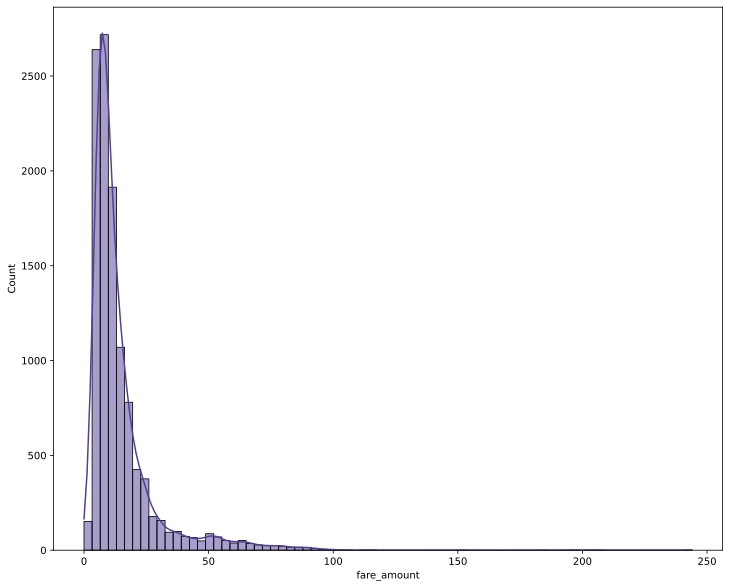

In [81]:
# frequency of fare_amount
sns.histplot(con_data_train2['fare_amount'], bins = 75, kde=True, color = '#533e98');

In [82]:
# fig1=plt.figure(figsize=(8, 6))
# ax5=fig1.add_subplot(1,1,1)
# ax5.scatter(con_data_train2.trip_distance, con_data_train2.fare_amount, color='green')
# ax5.set_title('The graph of payment depending on the trip_distance')
# ax5.set_xlabel('Day of the week')
# ax5.set_ylabel('Payment');

In [83]:
# fig2=plt.figure(figsize=(8, 6))
# ax5=fig2.add_subplot(1,1,1)
# ax5.scatter(con_data_train2.passenger_count, con_data_train2.fare_amount, color='green')
# ax5.set_title('The graph of payment depending on the number of passengers');
# ax5.set_xlabel('Number of passengers')
# ax5.set_ylabel('Payment');

In [84]:
# relationship between hour_dropoff and fare_amount
# plot(x = con_data_train2['hour_dropoff'], y = con_data_train2['fare_amount'])
# con_data.plot(x='fare_amount', y=['hour_pickup',hour_dropoff], kind='barh')

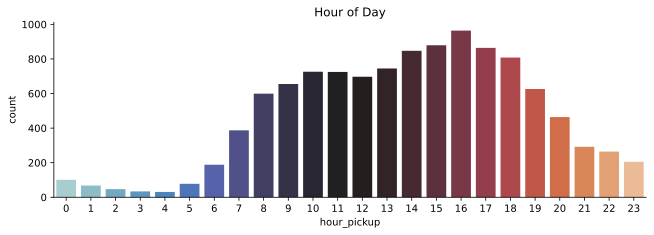

In [85]:
# taxi trip repartition by hour of the day
sns.catplot(x='hour_pickup', kind='count', palette='icefire', data=con_data_train2, height=3, aspect=3);
plt.title('Hour of Day');

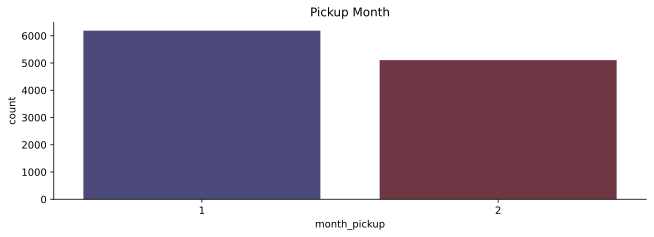

In [86]:
# taxi trip repartition by pickup month
sns.catplot(x='month_pickup', kind='count', palette='icefire', data=con_data_train2, height=3, aspect=3);
plt.title('Pickup Month');

1. Does the number of passengers affect the fare?

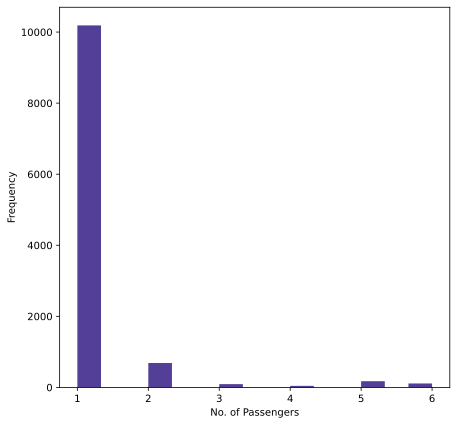

In [87]:
plt.figure(figsize=(7,7))
plt.hist(con_data_train2['passenger_count'], bins=15, color='#533e98' )
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency');

In [88]:
# plt.figure(figsize=(7,7))
# plt.scatter(x=con_data_train2['passenger_count'], y=con_data_train2['fare_amount'], s=1.5)
# plt.xlabel('No. of Passengers')
# plt.ylabel('Fare');

2. Does the time of pickup affect the fare?

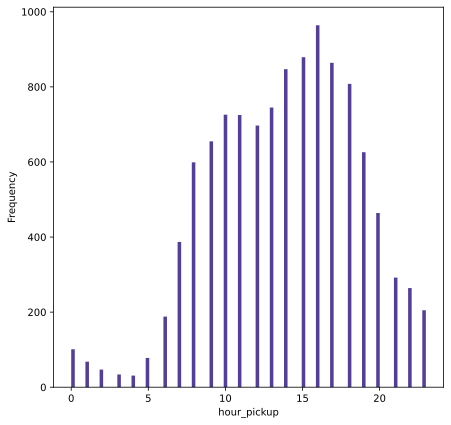

In [89]:
plt.figure(figsize=(7,7))
plt.hist(con_data_train2['hour_pickup'], bins=100, color='#533e98')
plt.xlabel('hour_pickup')
plt.ylabel('Frequency');

In [90]:
# plt.figure(figsize=(7,7))
# plt.scatter(x=con_data_train2['hour_pickup'], y=con_data_train2['fare_amount'], s=1.5)
# plt.xlabel('hour_pickup')
# plt.ylabel('Fare');

3. Does the day of the week affect the fare?

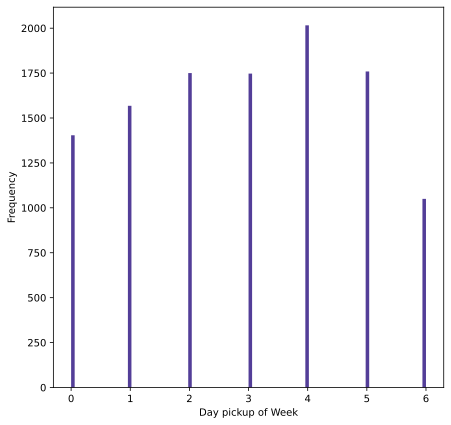

In [91]:
plt.figure(figsize=(7,7))
plt.hist(con_data_train2['week_day_pickup'], bins=100, color='#533e98')
plt.xlabel('Day pickup of Week')
plt.ylabel('Frequency');

 day of the week doesn't seem to have that much of an influence on the number of cab rides.

In [92]:
# plt.figure(figsize=(7,7))
# plt.scatter(x=con_data_train2['week_day_pickup'], y=con_data_train2['fare_amount'], s=1.5)
# plt.xlabel('Day pickup of Week')
# plt.ylabel('Fare');

---
## Scaling
scaling the features makes interpretation of regression coefficients easier

In [93]:
con_data_val.shape

(2880, 28)

In [94]:
con_data_train2.shape

(11294, 28)

In [95]:
scaler = StandardScaler()

con_data_train2[con_data_train2.columns]=scaler.fit_transform(con_data_train2[con_data_train2.columns])
con_data_val[con_data_val.columns]=scaler.transform(con_data_val[con_data_val.columns])
# con_data_test[con_data_test.columns]=scaler.transform(con_data_test[con_data_test.columns])

X_train=con_data_train2.drop('fare_amount',axis=1)
y_train=con_data_train2['fare_amount']
X_val=con_data_val.drop('fare_amount',axis=1)
y_val=con_data_val['fare_amount']
# X_test=con_data_test.drop('fare_amount',axis=1)
# y_test=con_data_test['fare_amount']

In [96]:
print("Length of the X_train = ",len(X_train))
print("Length of the y_train = ",len(y_train))
# print("Length of the X_test = ",len(X_test))
# print("Length of the y_test = ",len(y_test))
print("Length of the y_val = ",len(y_val))
print("Length of the y_val = ",len(y_val))

Length of the X_train =  11294
Length of the y_train =  11294
Length of the y_val =  2880
Length of the y_val =  2880


---
### Model Building
Model with all features

In [97]:
seed = 199
lm = LinearRegression()
lm1 = lm.fit(X_train,y_train)
y_pred_val = lm1.predict(X_val)
y_pred_train = lm1.predict(X_train)
# y_pred_test = lm1.predict(X_test)
print("Score of training set = ",lm1.score(X_train,y_train))

Score of training set =  0.8560440526930603


In [98]:
print("Score of validation set = ",lm1.score(X_val,y_val))

Score of validation set =  0.8937669028816388


In [99]:
# from sklearn import metrics
# print('\nLinear Regression Performance Metrics')
# print('R^2=',metrics.explained_variance_score(y_test,y_pred_lm))
# print('MAE:',metrics.mean_absolute_error(y_test,y_pred_lm))
# print('MSE:',metrics.mean_squared_error(y_test,y_pred_lm))
# print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lm)))

In [100]:
y_pred_train.shape

(11294,)

In [101]:
y_train.shape

(11294,)

In [102]:
X_train.shape 

(11294, 27)

In [103]:
X_val.shape

(2880, 27)

In [104]:
y_val.shape

(2880,)

## R-squared

In [105]:
def SSE(actuals, preds):
    return np.sum((actuals - preds)**2)



In [106]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y_train,y_pred_train)

0.8560440526930603

In [107]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y_val,y_pred_val)

0.893766902881639

In [108]:
lm.score(X_train,y_train)

0.8560440526930603

In [109]:
lm.score(X_val,y_val)

0.8937669028816388

## Ridge Regularization

In [110]:
lr_model_ridge = Ridge(alpha = 1000000000000)
lr_model_ridge.fit(X_train, y_train)

list(zip(X_train.columns, lr_model_ridge.coef_))

[('PULocationID', 2.205425925637902e-09),
 ('DOLocationID', 9.205517877668061e-10),
 ('passenger_count', -1.868597188279931e-10),
 ('trip_distance', 1.0393931317829335e-08),
 ('extra', -1.4525848292627813e-10),
 ('mta_tax', -5.520734949450963e-10),
 ('tip_amount', 1.512948648023179e-09),
 ('tolls_amount', 6.4337673057416105e-09),
 ('improvement_surcharge', 9.942048608985127e-11),
 ('month_pickup', 3.9105180035759185e-10),
 ('week_day_pickup', -1.863971080993119e-10),
 ('day_pickup', -2.8328532187175275e-11),
 ('hour_pickup', -6.231799507948921e-10),
 ('month_dropoff', 3.910518003575919e-10),
 ('week_day_dropoff', -2.0172027807526412e-10),
 ('day_dropoff', -2.5959882854164717e-11),
 ('hour_dropoff', -2.0548636314573703e-10),
 ('creative_mobile_technologies_LLC', -9.911683251934172e-10),
 ('verifone_inc', 9.911683251934175e-10),
 ('not_a_store_and_forward_trip', 1.1492324454102518e-10),
 ('store_and_forward_trip', -1.1492324454102521e-10),
 ('credit_card', 2.2138096584676193e-09),
 ('cas

In [111]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 



In [112]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,:].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,:].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

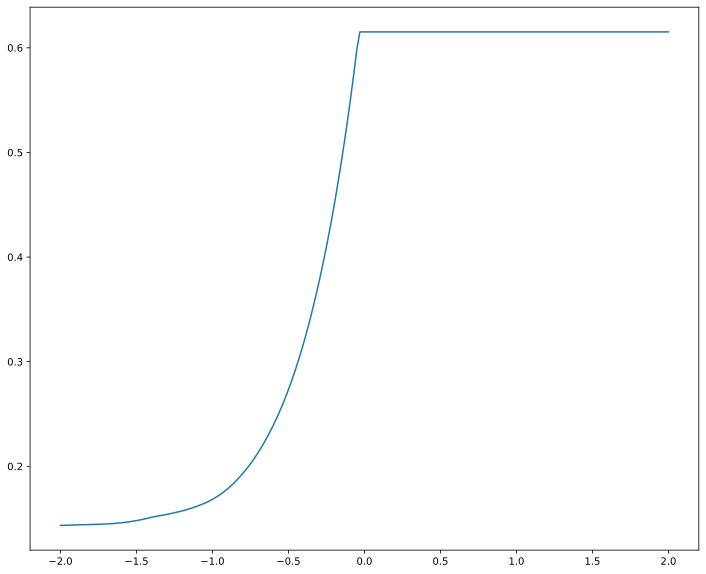

In [113]:

plt.plot(np.log10(alphalist), err_vec_val);

In [114]:
np.min(err_vec_val)

0.143470854197428

In [115]:
alphalist[np.argmin(err_vec_val)]

0.01